In [1]:
import numpy as np
import pandas as pd
import pickle
from PIL import Image, UnidentifiedImageError
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os


In [2]:
## LOAD DATA AND METADATA ##

# subset the metadata to just the files in a specific folder
folder_path = "/Users/brianmiller/Desktop/collection_files/images_3k/"

metadata_df_subset = pd.read_pickle('/Users/brianmiller/Desktop/collection_files/metadata_3k_subset.pickle')


In [3]:
##  GET SIZE METADATA ABOUT THE IMAGES  ##

# Define empty lists for the dimensions and resolution
widths = []
heights = []
resolutions = []

files_rotated = 0

# Loop through the filenames in the dataframe
for filename in metadata_df_subset['image_name_file']:
    
    # Open the image using Pillow
    image = Image.open(folder_path+filename)
    
    # Get the dimensions and resolution
    width, height = image.size
    resolution = image.info.get('dpi', None)
    
    # if the image is on its side, then rotate the image
    if width > height:
        files_rotated +=1  # add to counter
        image = image.rotate(90, expand=True)  # rotate the image by 90 degrees clockwise
        image.save(filename)  # save the rotated image
        
        # Re-get the dimensions and resolution
        width, height = image.size
    
    # Add the values to the lists
    widths.append(width)
    heights.append(height)
    resolutions.append(resolution)
    
    # Close the image file
    image.close()


# Add the lists to the dataframe as new columns
metadata_df_subset['width'] = widths
metadata_df_subset['height'] = heights
metadata_df_subset['resolution'] = resolutions

print("Files Rotated: {}".format(files_rotated))
print(metadata_df_subset.info())

metadata_df = metadata_df_subset


Files Rotated: 3282
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29368 entries, 1 to 3000
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               29368 non-null  int64  
 1   grade            29368 non-null  object 
 2   image_name       29368 non-null  object 
 3   price            28416 non-null  object 
 4   desc             29368 non-null  object 
 5   source           29368 non-null  object 
 6   grade_num        29368 non-null  int64  
 7   price_num        28416 non-null  float64
 8   year             28954 non-null  float64
 9   image_name_file  29368 non-null  object 
 10  source_clean     29368 non-null  object 
 11  width            29368 non-null  int64  
 12  height           29368 non-null  int64  
 13  resolution       29342 non-null  object 
dtypes: float64(2), int64(4), object(8)
memory usage: 3.4+ MB
None


In [ ]:
##  VISUALIZE DISTRIBUTION  ##

sns.countplot(x='grade_num', data=metadata_df,color='steelblue', order=sorted(metadata_df['grade_num'].unique(), reverse=True))

# Set the plot title and axis labels
plt.title('Dataset Breakdown by PSA Grade')
plt.xlabel('PSA Grade')
plt.ylabel('Downloaded Images')

# Display the plot
plt.show()




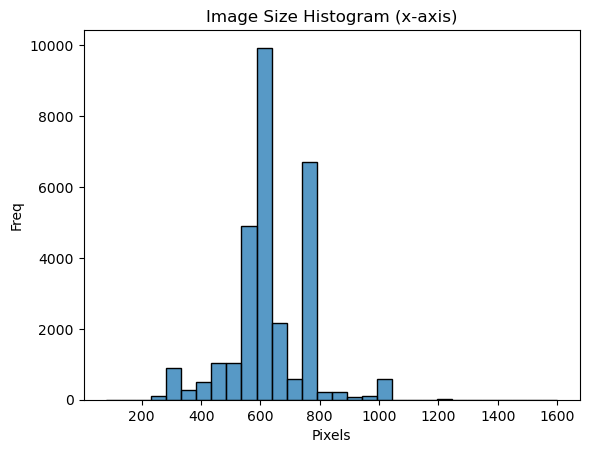

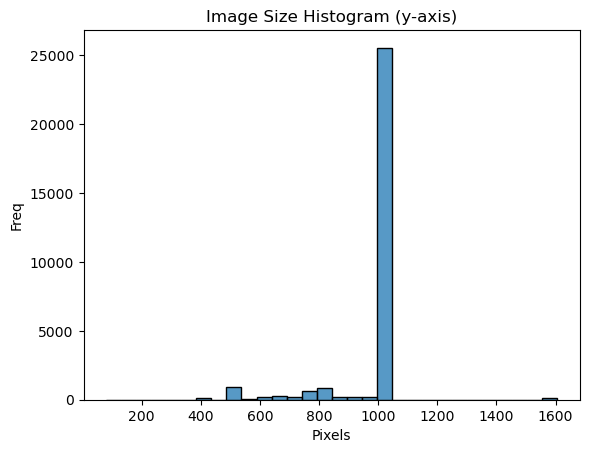

In [4]:
## IMAGE DIMENSIONS DISTRIBUTIONS
sns.histplot(metadata_df['width'], kde=False, bins=30)
plt.title('Image Size Histogram (x-axis)')
plt.xlabel('Pixels')
plt.ylabel('Freq')
plt.show()

sns.histplot(metadata_df['height'], kde=False, bins=30)
plt.title('Image Size Histogram (y-axis)')
plt.xlabel('Pixels')
plt.ylabel('Freq')
plt.show()

In [ ]:
sns.histplot(metadata_df['year'], kde=False, bins=20)
plt.title('Frequency of Card by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [ ]:
# Compute the top 5 most frequent unique values and group the rest as 'others'
source_counts = metadata_df['source_clean'].value_counts()
top_4_sources = source_counts.index[:4]
source_counts = source_counts[top_4_sources].append(pd.Series([source_counts[top_4_sources[4:]].sum()], index=['others']))

# Create the pie chart with the modified value counts and a legend
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(source_counts, labels=None, autopct='%1.1f%%', startangle=90)
plt.legend(source_counts.index, title='Sources', loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Set the title and adjust the font size
plt.title('Top 5 Data Sources', fontsize=15, loc='right')
plt.show()


In [ ]:
sns.boxplot(x='grade_num', y='price_num', data= metadata_df[metadata_df['price_num'] < 500], palette='Blues')
plt.title('Price Breakdown by PSA', fontsize=12, loc='center')
plt.show()

In [ ]:

# create violin plot
sns.violinplot(x='grade_num', y='price_num', data=metadata_df[metadata_df['price_num'] < 500], color='steelblue')

# set x and y labels and title
plt.xlabel('Score')
plt.ylabel('Price')
plt.title('Price Distribution by Score')

# show plot
plt.show()

In [ ]:
df_subset = metadata_df[metadata_df['grade_num'] == 8]
df_subset = metadata_df[metadata_df['price_num'] < 2000]

# create histogram
sns.histplot(data=df_subset, x='price_num', bins=50)

# set x and y labels and title
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution where Price=1')

# show plot
plt.show()